# Importing libraries

In [37]:
# Importing necessary libraries
import pandas as pd
from nltk import DecisionTreeClassifier
from nltk.classify.svm import SvmClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Data analysis part

Dataset 1:
   id  LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0   1          0             1                     0             0   
1   2          0             1                     0             0   
2   3          0             1                     0             0   
3   4          0             1                     0             0   
4   5          2             1                     0             0   

   CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                      1                  1                     1   
1                      1                  1                     1   
2                      1                  1                     1   
3                      1                  1                     1   
4                      1                  1                     1   

   LOC_EXECUTABLE  HALSTEAD_CONTENT  ...  HALSTEAD_LENGTH  HALSTEAD_LEVEL  \
0               3             11.58  ...               11            0.38   

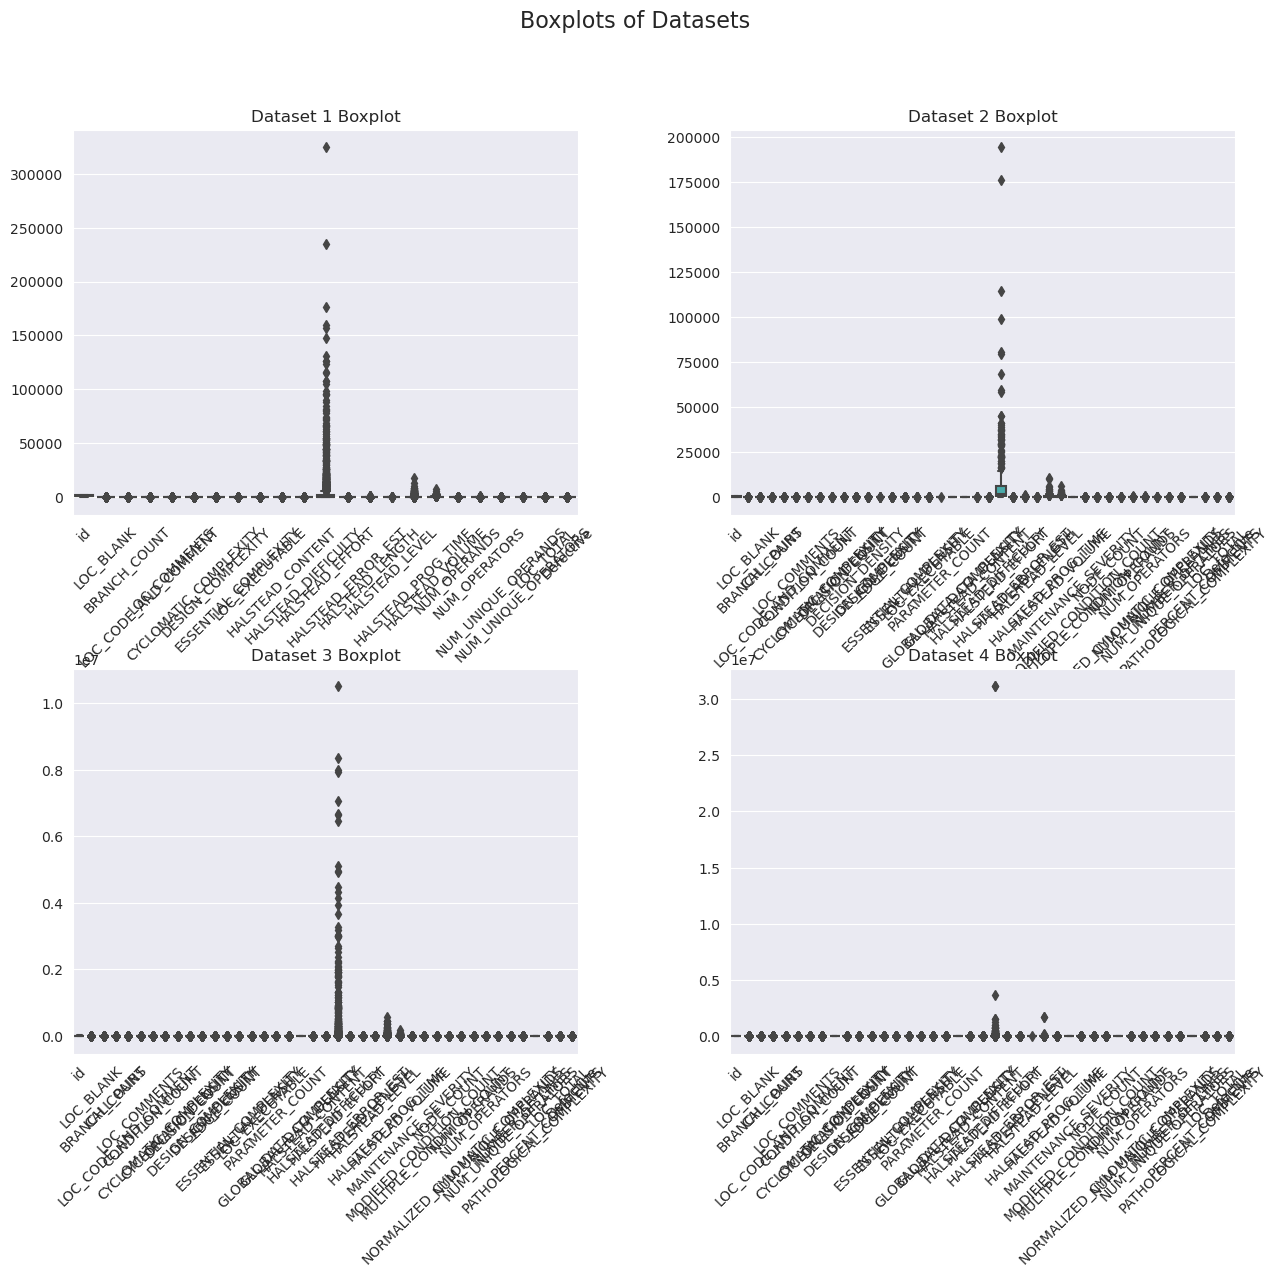

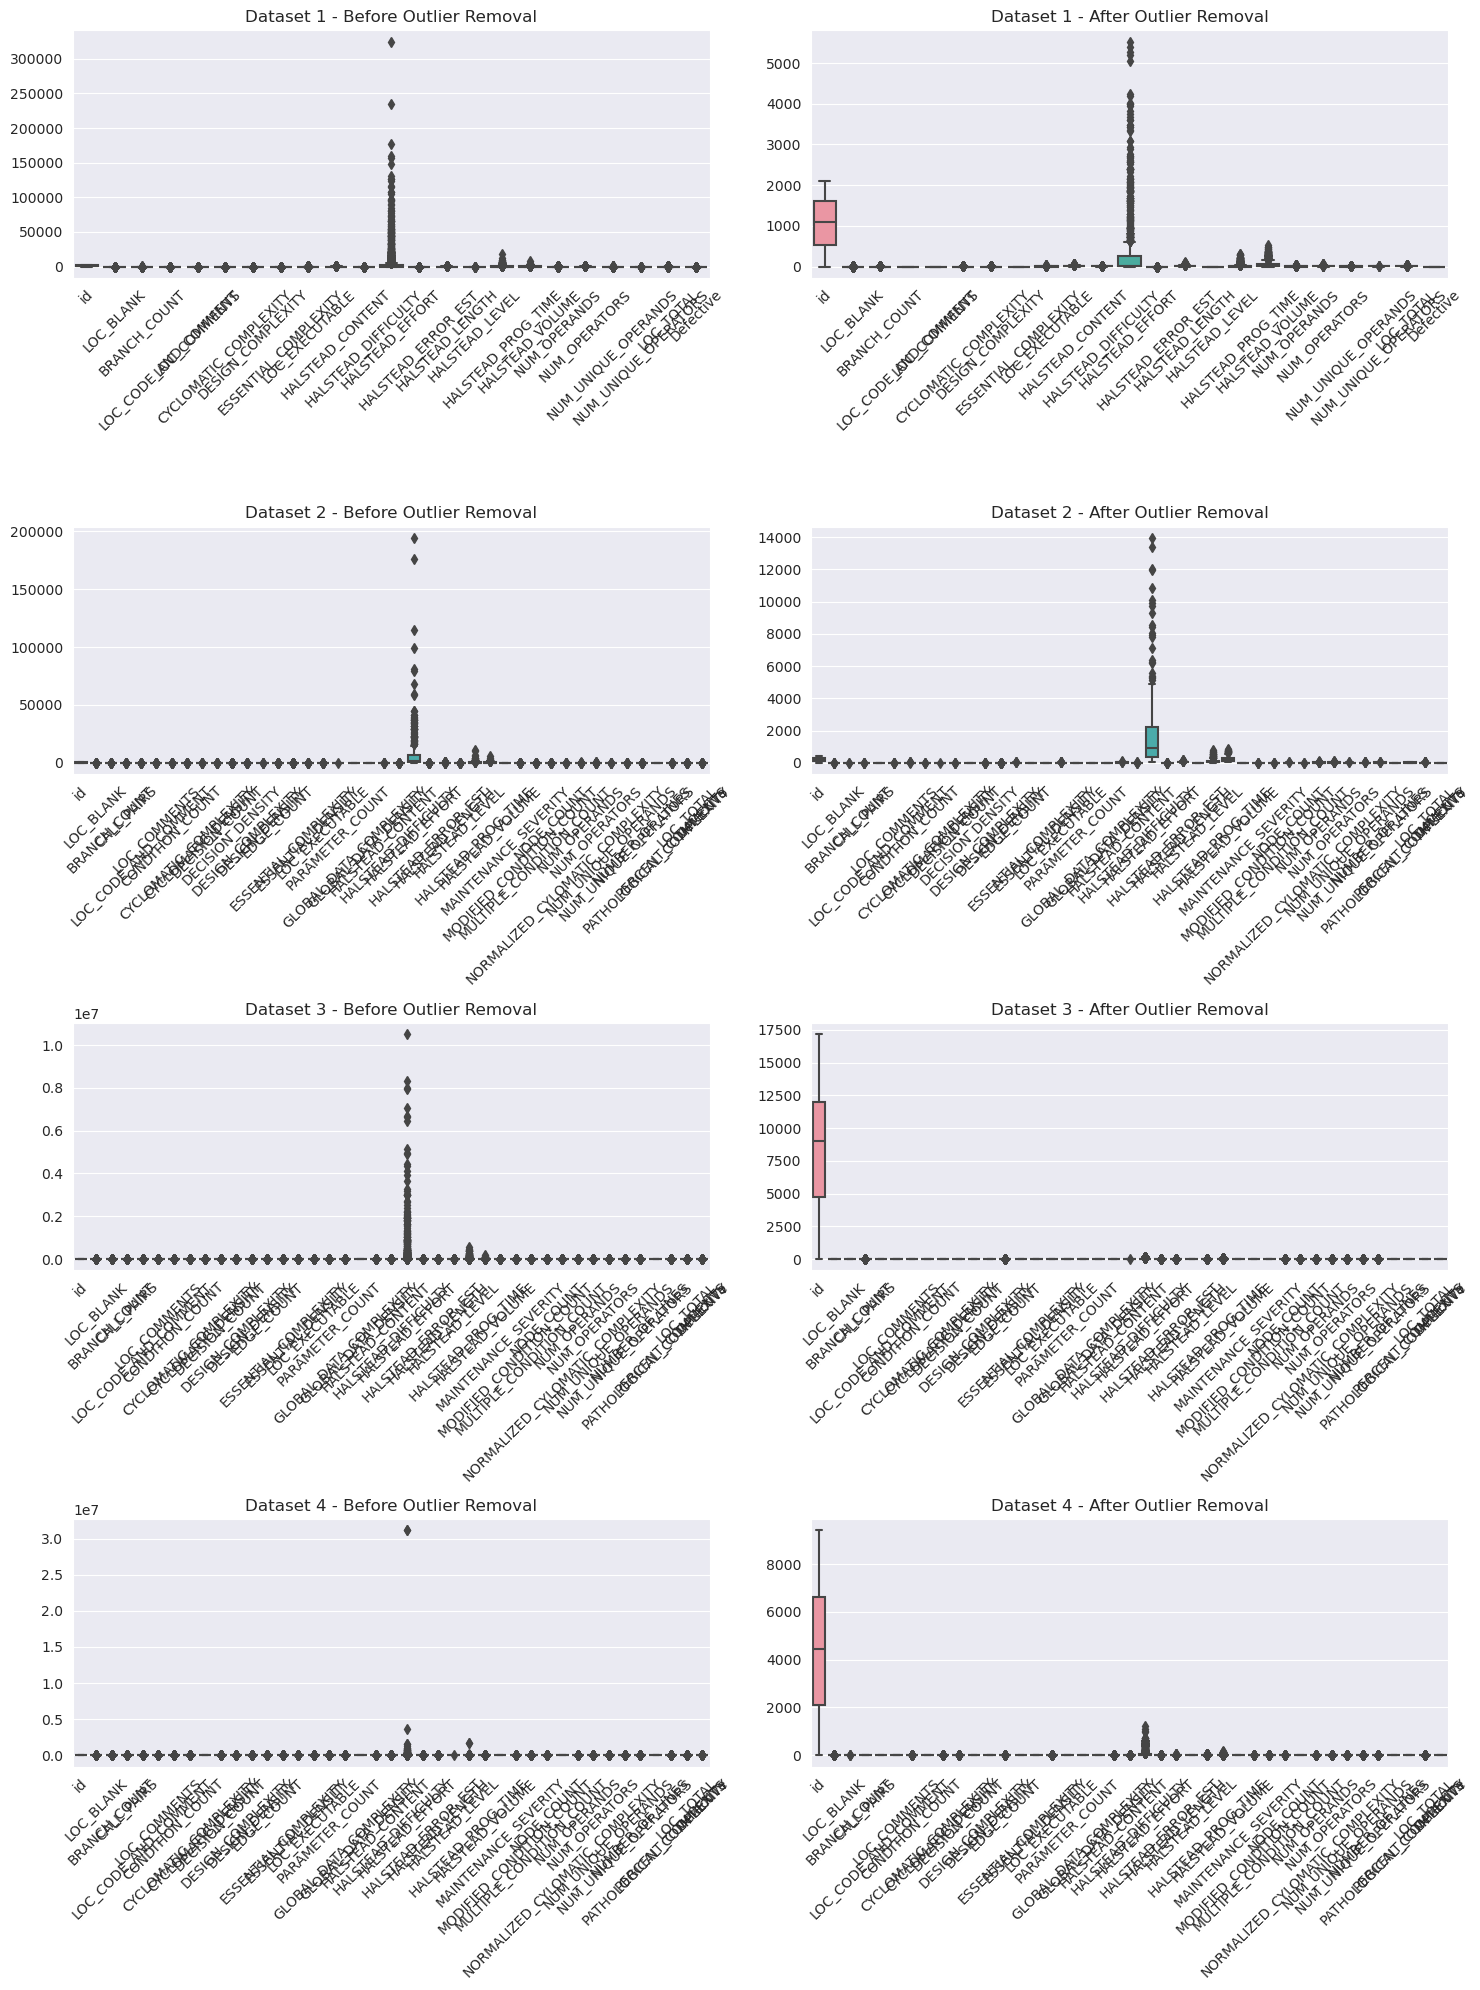

<Figure size 1000x600 with 0 Axes>

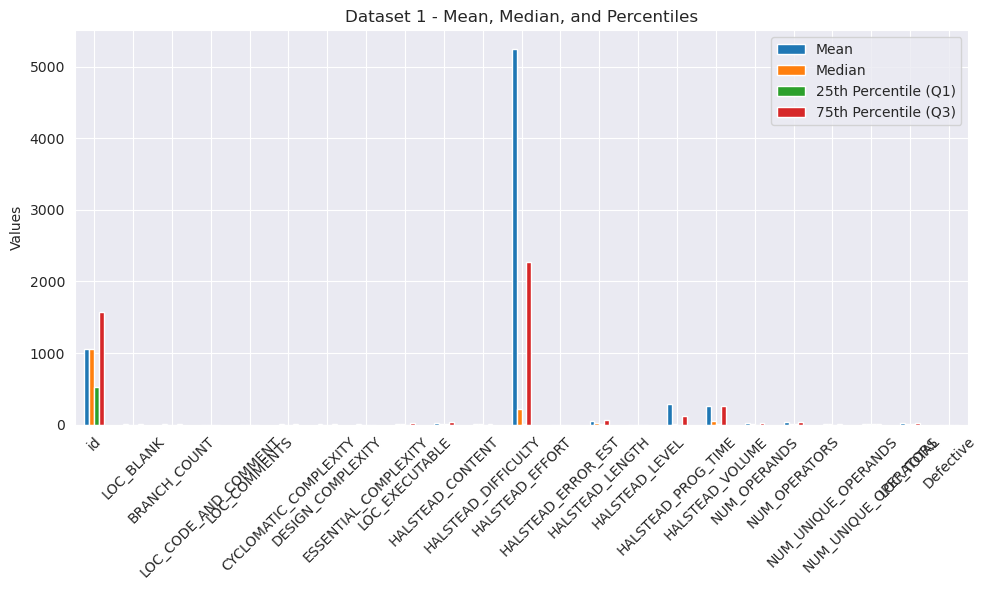

<Figure size 1000x600 with 0 Axes>

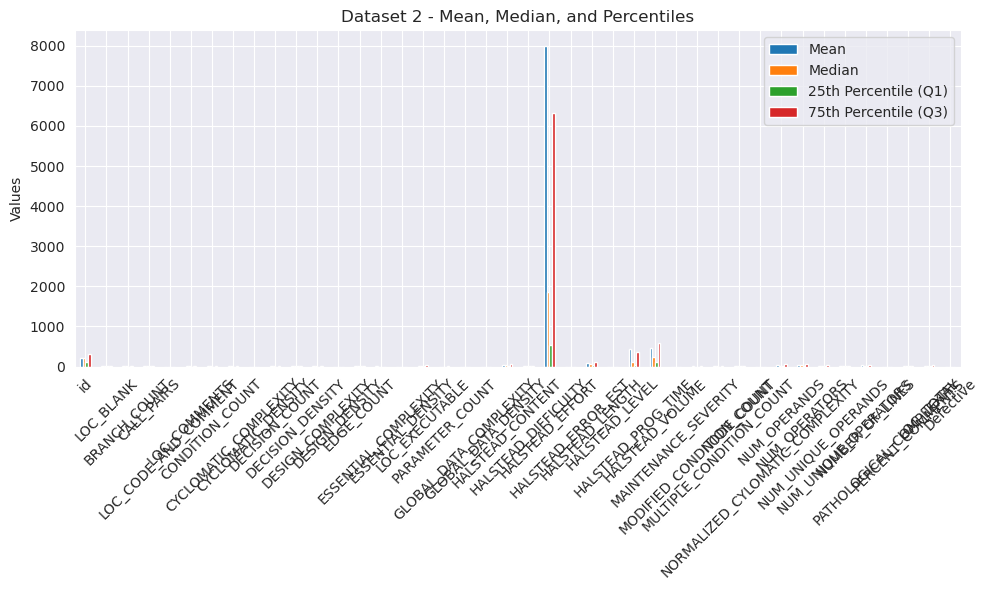

<Figure size 1000x600 with 0 Axes>

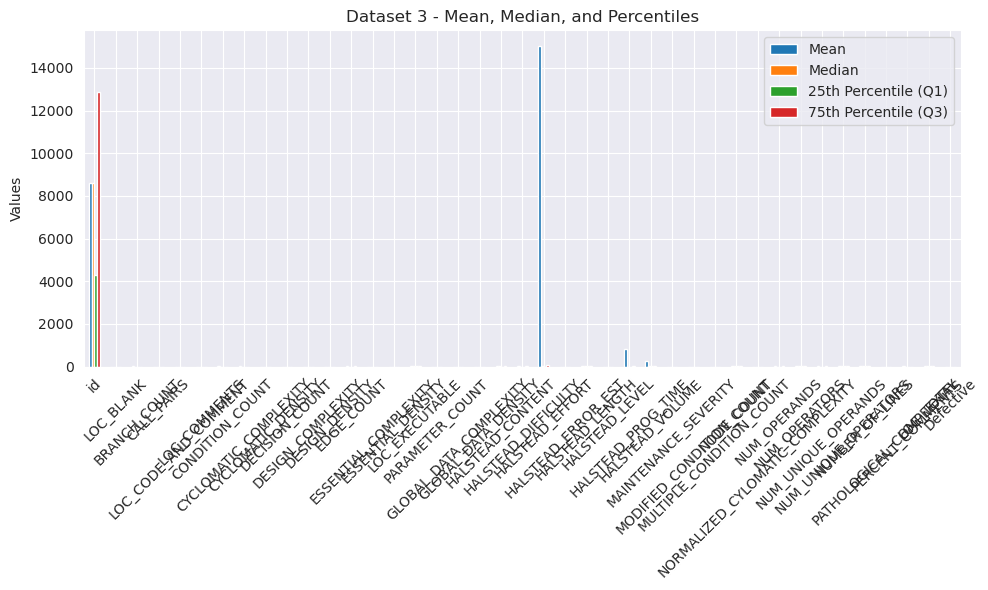

<Figure size 1000x600 with 0 Axes>

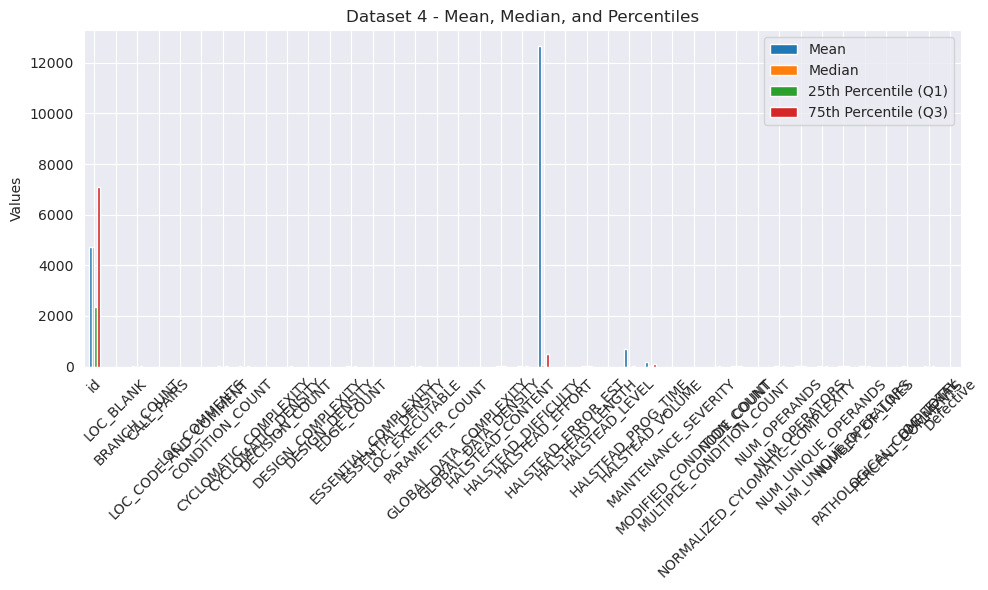

<Figure size 1000x600 with 0 Axes>

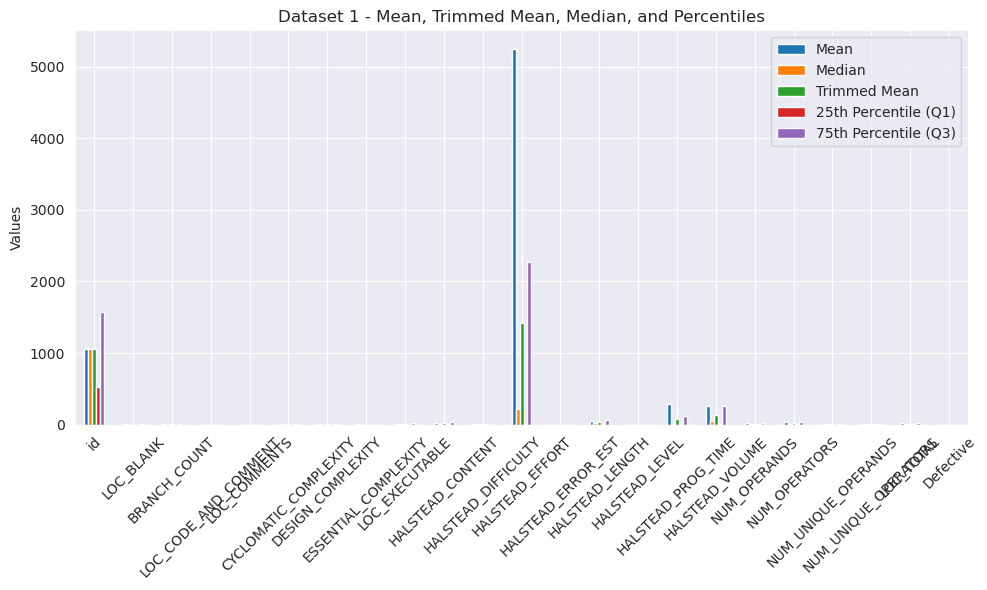

<Figure size 1000x600 with 0 Axes>

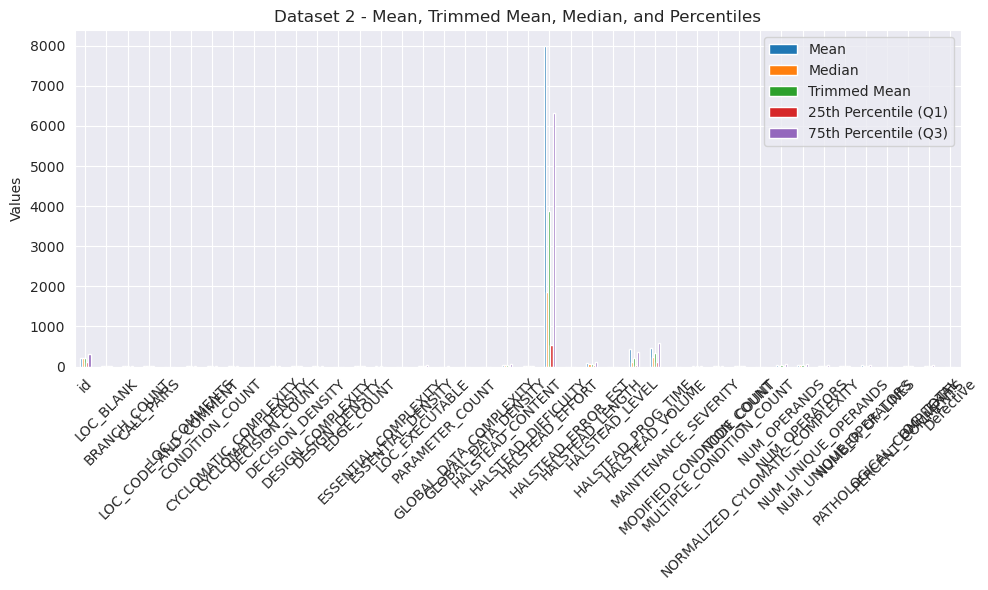

<Figure size 1000x600 with 0 Axes>

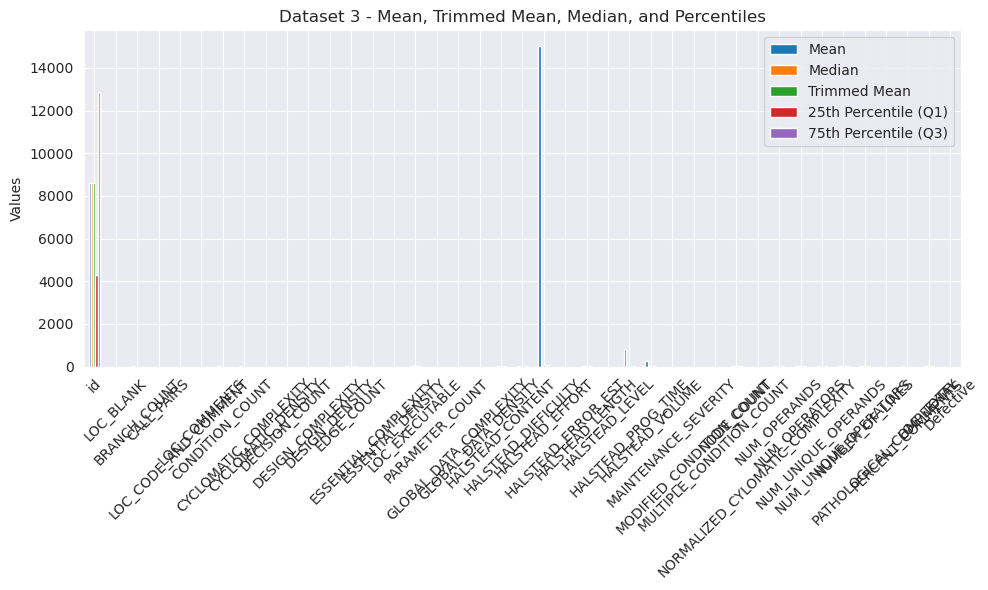

<Figure size 1000x600 with 0 Axes>

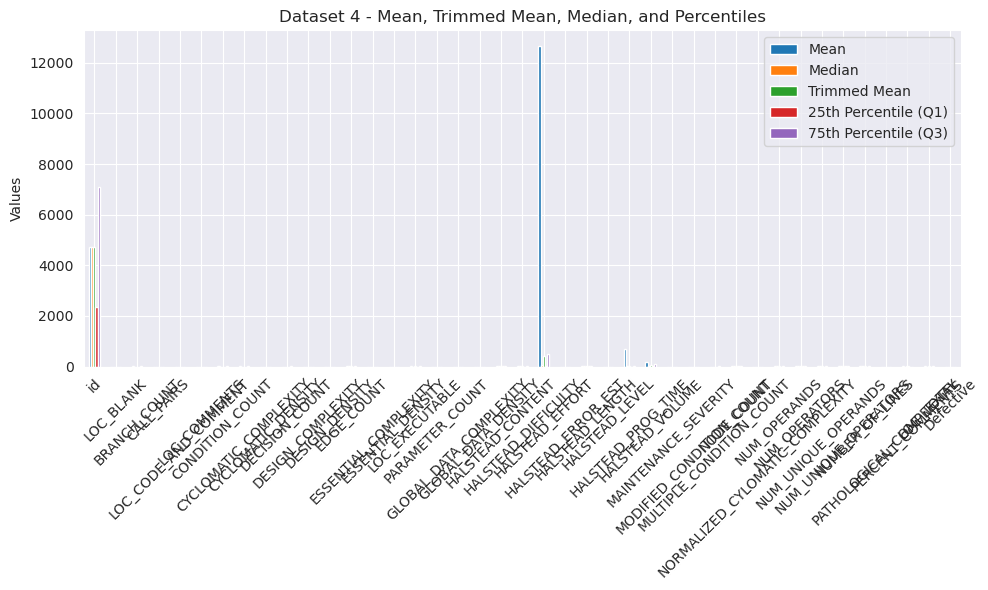

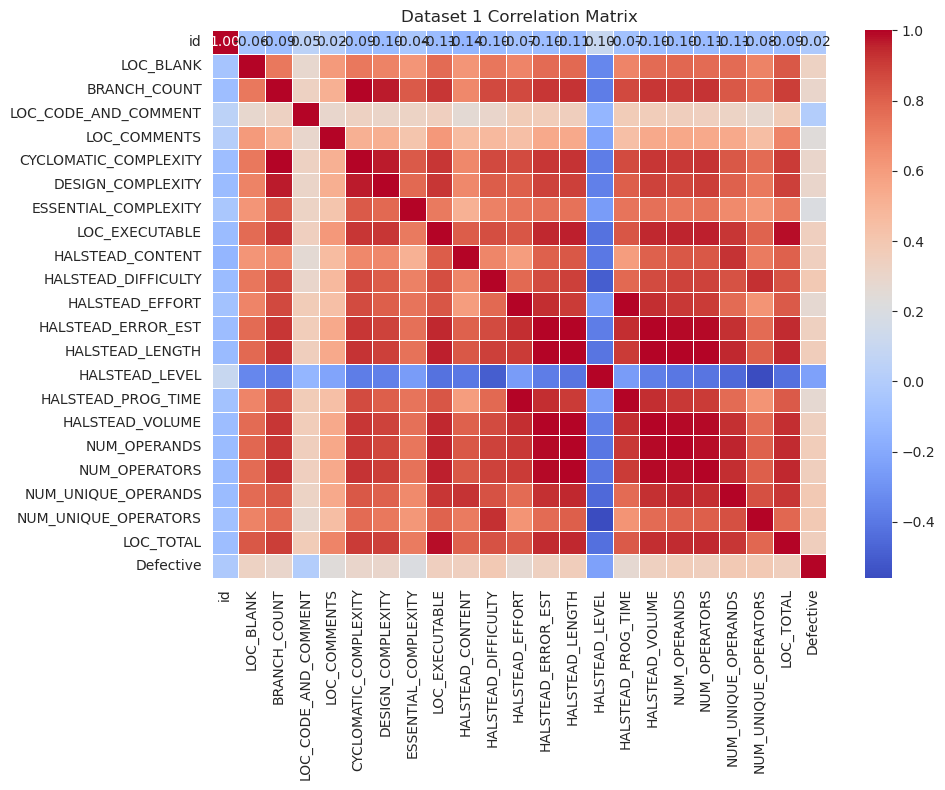

/home/akash-soam/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


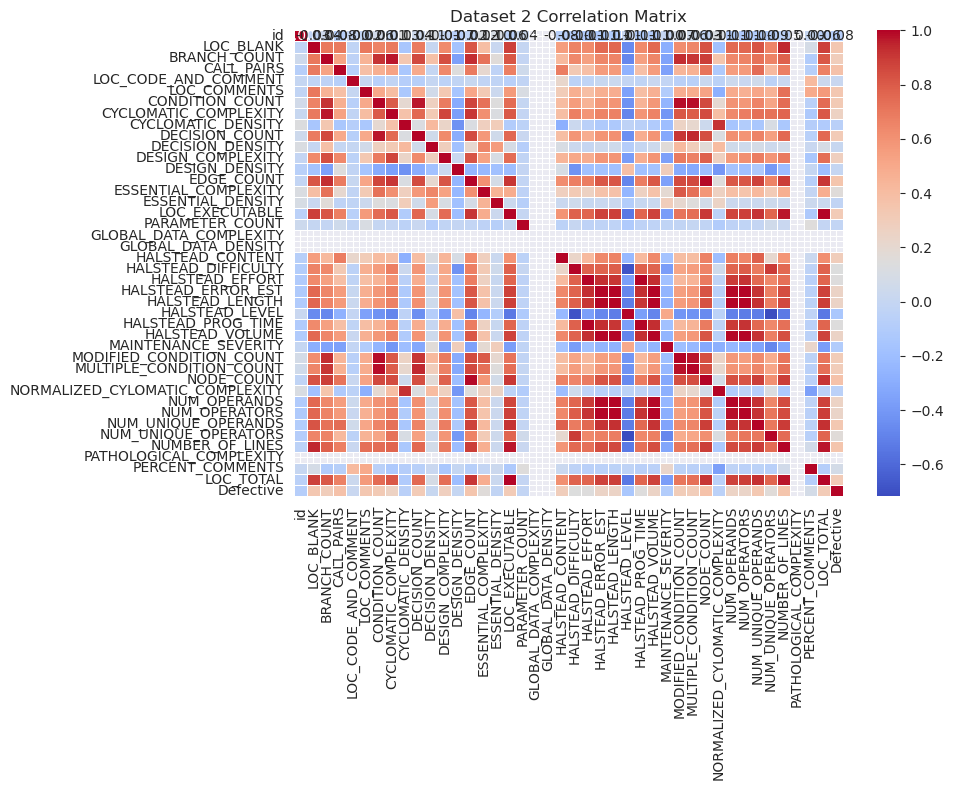

/home/akash-soam/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


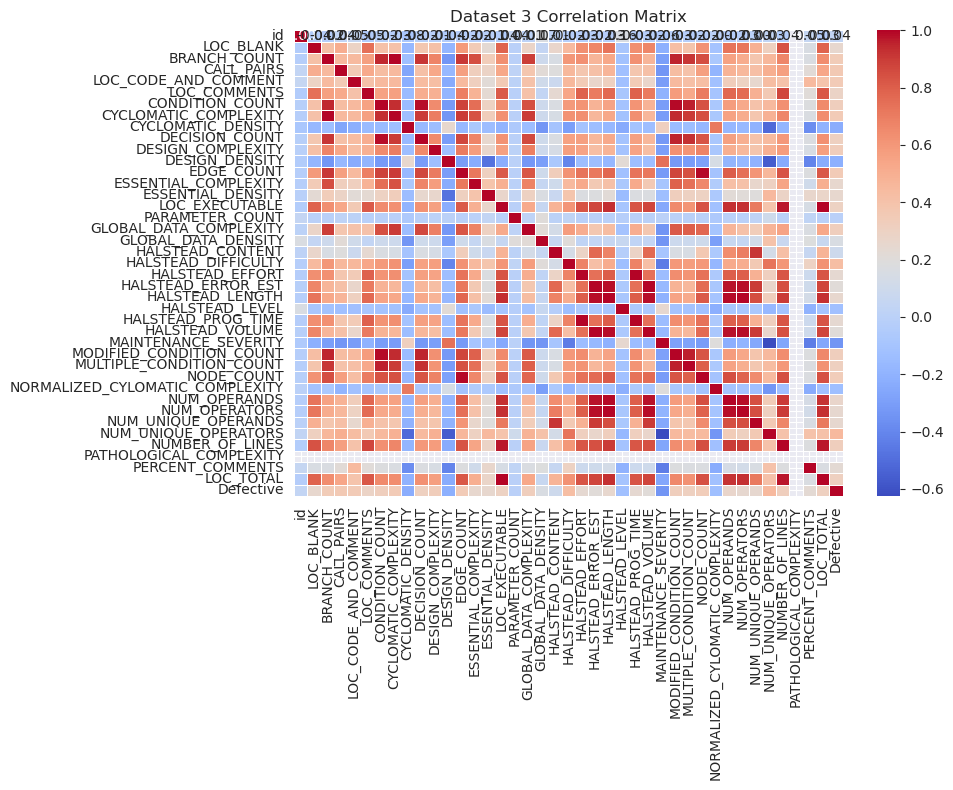

/home/akash-soam/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


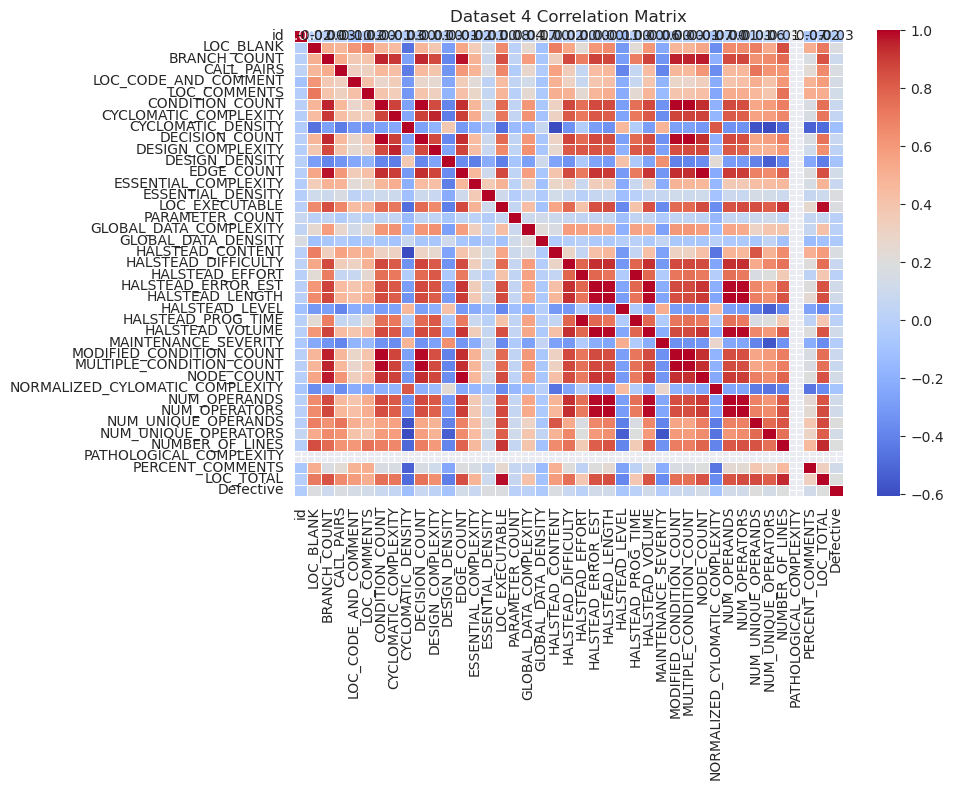

In [38]:
# Load the four datasets
df1 = pd.read_csv('csv_result-KC1.csv')
df2 = pd.read_csv('csv_result-MW1.csv')
df3 = pd.read_csv('csv_result-PC5.csv')
df4 = pd.read_csv('csv_result-MC1.csv')

# Displaying first few rows of each dataset
print("Dataset 1:")
print(df1.head())

print("\nDataset 2:")
print(df2.head())

print("\nDataset 3:")
print(df3.head())

print("\nDataset 4:")
print(df4.head())


# Check dataset information for each dataset
print("Dataset 1 Information:")
df1.info()

print("\nDataset 2 Information:")
df2.info()

print("\nDataset 3 Information:")
df3.info()

print("\nDataset 4 Information:")
df4.info()



# Check for missing values in each dataset
print("Missing values in Dataset 1:")
print(df1.isnull().sum())

print("\nMissing values in Dataset 2:")
print(df2.isnull().sum())

print("\nMissing values in Dataset 3:")
print(df3.isnull().sum())

print("\nMissing values in Dataset 4:")
print(df4.isnull().sum())



import re
# Function to clean non-numeric characters from a string
def clean_non_numeric(data):
    if isinstance(data, str):
        return pd.to_numeric(re.sub(r'[^0-9.]', '', data), errors='coerce')
    return pd.to_numeric(data, errors='coerce')

# Apply the cleaning function to all columns in the DataFrame
df1 = df1.map(clean_non_numeric)
df2 = df2.map(clean_non_numeric)
df3 = df3.map(clean_non_numeric)
df4 = df4.map(clean_non_numeric)


# Fill missing values with the mean for each dataset
df1.fillna(df1.mean(), inplace=True)
df2.fillna(df2.mean(), inplace=True)
df3.fillna(df3.mean(), inplace=True)
df4.fillna(df4.mean(), inplace=True)

# Verify missing values have been filled
print("Missing values after handling in Dataset 1:")
print(df1.isnull().sum())
print("Missing values after handling in Dataset 2:")
print(df2.isnull().sum())
print("Missing values after handling in Dataset 3:")
print(df3.isnull().sum())
print("Missing values after handling in Dataset 4:")
print(df4.isnull().sum())



# Generate descriptive statistics for each dataset
print("\nDescriptive Statistics for Dataset 1:")
print(df1.describe())

print("\nDescriptive Statistics for Dataset 2:")
print(df2.describe())

print("\nDescriptive Statistics for Dataset 3:")
print(df3.describe())

print("\nDescriptive Statistics for Dataset 4:")
print(df4.describe())



import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for all datasets
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Boxplots of Datasets', fontsize=16)

# Plot boxplot for Dataset 1
sns.boxplot(data=df1, ax=axs[0, 0])
axs[0, 0].set_title('Dataset 1 Boxplot')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot boxplot for Dataset 2
sns.boxplot(data=df2, ax=axs[0, 1])
axs[0, 1].set_title('Dataset 2 Boxplot')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot boxplot for Dataset 3
sns.boxplot(data=df3, ax=axs[1, 0])
axs[1, 0].set_title('Dataset 3 Boxplot')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot boxplot for Dataset 4
sns.boxplot(data=df4, ax=axs[1, 1])
axs[1, 1].set_title('Dataset 4 Boxplot')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()



import seaborn as sns
import matplotlib.pyplot as plt

# Prepare subplots for comparison
fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns

# Iterate over datasets to remove outliers and plot results
for i, df in enumerate([df1, df2, df3, df4], start=1):
    # Before removing outliers
    sns.boxplot(data=df, ax=axs[i-1, 0])
    axs[i-1, 0].set_title(f'Dataset {i} - Before Outlier Removal')
    axs[i-1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Calculate IQR and remove outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # After removing outliers
    sns.boxplot(data=df_cleaned, ax=axs[i-1, 1])
    axs[i-1, 1].set_title(f'Dataset {i} - After Outlier Removal')
    axs[i-1, 1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()



# Iterate over datasets to calculate and plot mean, median, and percentiles
for i, df in enumerate([df1, df2, df3, df4], start=1):
    mean = df.mean()
    median = df.median()
    percentile_25 = df.quantile(0.25)
    percentile_75 = df.quantile(0.75)

    # Create a DataFrame for the statistics to plot
    stats_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        '25th Percentile (Q1)': percentile_25,
        '75th Percentile (Q3)': percentile_75
    })

    # Plot the statistics for the current dataset
    plt.figure(figsize=(10, 6))
    stats_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Dataset {i} - Mean, Median, and Percentiles')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


from scipy.stats import trim_mean

# Trimming fraction (10%)
trim_fraction = 0.1

# Iterate over datasets to calculate trimmed mean and other statistics, and plot them
for i, df in enumerate([df1, df2, df3, df4], start=1):
    # Calculate statistics
    mean = df.mean()
    median = df.median()
    percentile_25 = df.quantile(0.25)
    percentile_75 = df.quantile(0.75)

    # Calculate trimmed mean
    trimmed_mean = trim_mean(df, proportiontocut=trim_fraction)

    # Create a DataFrame for the statistics to plot
    stats_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Trimmed Mean': trimmed_mean,
        '25th Percentile (Q1)': percentile_25,
        '75th Percentile (Q3)': percentile_75
    })

    # Plot the statistics for the current dataset
    plt.figure(figsize=(10, 6))
    stats_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Dataset {i} - Mean, Trimmed Mean, Median, and Percentiles')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix heatmap for each dataset
for i, df in enumerate([df1, df2, df3, df4], start=1):
    plt.figure(figsize=(10, 8))

    # Generate a correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Dataset {i} Correlation Matrix')

    # Show the heatmap
    plt.tight_layout()
    plt.show()

# Function to preprocess the dataset (handle missing values, scaling, train/test split)


In [39]:
def preprocess_data(dataset, target_column):
    # Drop rows with missing target values (if any)
    dataset = dataset.dropna(subset=[target_column])

    # Separating the features (X) and target (y)
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features (scale the data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to evaluate models using precision, recall, f1 score, and other metrics


In [40]:
def evaluate_model(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred.round(), average='weighted', zero_division=1)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return precision, recall, f1, mse, r2


# Load the datasets


In [41]:
dataset_kc1 = pd.read_csv('csv_result-KC1.csv')
dataset_mw1 = pd.read_csv('csv_result-MW1.csv')
dataset_pc5 = pd.read_csv('csv_result-PC5.csv')
dataset_mc1 = pd.read_csv('csv_result-MC1.csv')


# Preprocess the KC1, JM1, PC5, MC1 datasets

In [42]:
X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1 = preprocess_data(dataset_kc1, 'Defective')
X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1 = preprocess_data(dataset_mw1, 'Defective')
X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5 = preprocess_data(dataset_pc5, 'Defective')
X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1 = preprocess_data(dataset_mc1, 'Defective')


# Dictionary to store results for both datasets

In [43]:
results_kc1 = {}
results_mw1 = {}
results_pc5 = {}
results_mc1 = {}

# Models to be applied


In [44]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM Regression': SVC(kernel='linear'),
    'Decision Tree Classification': DecisionTreeClassifier(criterion='entropy'),
    'Random Forest Classification': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate each model for the KC1 dataset


In [45]:
for model_name, model in models.items():
    model.fit(X_train_kc1, y_train_kc1)
    y_pred = model.predict(X_test_kc1)
    results_kc1[model_name] = evaluate_model(y_test_kc1, y_pred)

# Train and evaluate each model for the MW1 dataset

In [46]:
for model_name, model in models.items():
    model.fit(X_train_mw1, y_train_mw1)
    y_pred = model.predict(X_test_mw1)
    results_mw1[model_name] = evaluate_model(y_test_mw1, y_pred)

# Train and evaluate each model for the PC5 dataset

In [47]:
for model_name, model in models.items():
    model.fit(X_train_pc5, y_train_pc5)
    y_pred = model.predict(X_test_pc5)
    results_pc5[model_name] = evaluate_model(y_test_pc5, y_pred)

# Train and evaluate each model for the MC1 dataset

In [48]:
for model_name, model in models.items():
    model.fit(X_train_mc1, y_train_mc1)
    y_pred = model.predict(X_test_mc1)
    results_mc1[model_name] = evaluate_model(y_test_mc1, y_pred)

# Convert results to DataFrame for easy comparison

In [49]:
results_kc1_df = pd.DataFrame(results_kc1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_mw1_df = pd.DataFrame(results_mw1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_pc5_df = pd.DataFrame(results_pc5, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
results_mc1_df = pd.DataFrame(results_mc1, index=['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
print("KC1 Dataset Results:\n", results_kc1_df)
print("\nMW1 Dataset Results:\n", results_mw1_df)
print("\nPC1 Dataset Results:\n", results_pc5_df)
print("\nMC1 Dataset Results:\n", results_mc1_df)

KC1 Dataset Results:
            Logistic Regression  SVM Regression  Decision Tree Classification  \
Precision             0.801150        0.769925                      0.815627   
Recall                0.838863        0.831754                      0.831754   
F1 Score              0.801022        0.775415                      0.821913   
MSE                   0.161137        0.168246                      0.168246   
R2 Score             -0.178142       -0.230119                     -0.230119   

           Random Forest Classification  
Precision                      0.831596  
Recall                         0.853081  
F1 Score                       0.834089  
MSE                            0.146919  
R2 Score                      -0.074188  

MW1 Dataset Results:
            Logistic Regression  SVM Regression  Decision Tree Classification  \
Precision             0.854701        0.853776                      0.897040   
Recall                0.888889        0.876543                

# Plot the comparison of F1 Score for all 4 datasets


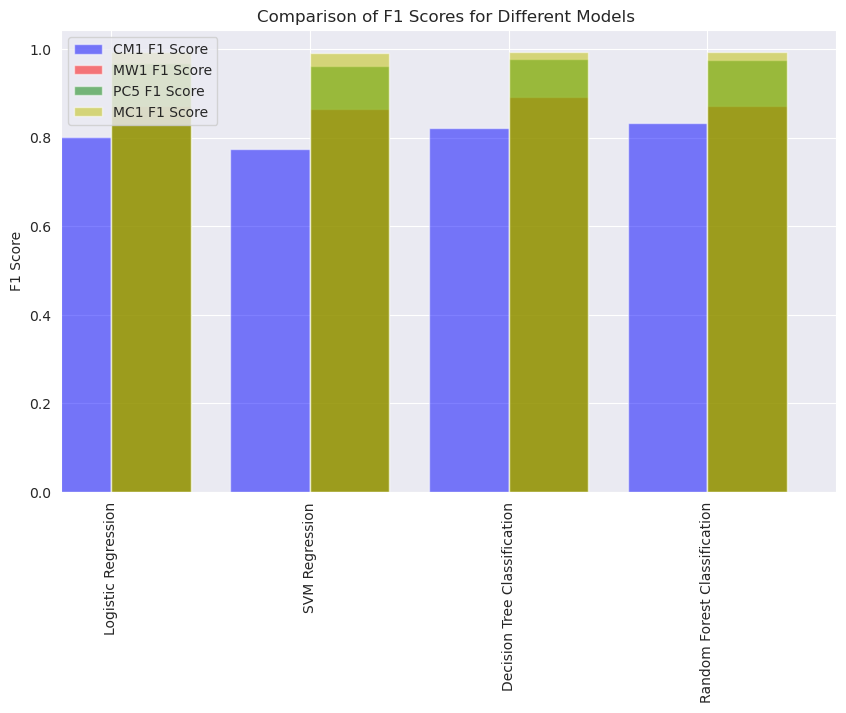

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
results_kc1_df.loc['F1 Score'].plot(kind='bar', color='b', alpha=0.5, ax=ax, position=1, width=0.4, label='CM1 F1 Score')
results_mw1_df.loc['F1 Score'].plot(kind='bar', color='r', alpha=0.5, ax=ax, position=0, width=0.4, label='MW1 F1 Score')
results_pc5_df.loc['F1 Score'].plot(kind='bar', color='g', alpha=0.5, ax=ax, position=0, width=0.4, label='PC5 F1 Score')
results_mc1_df.loc['F1 Score'].plot(kind='bar', color='y', alpha=0.5, ax=ax, position=0, width=0.4, label='MC1 F1 Score')

plt.title("Comparison of F1 Scores for Different Models ")
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Plot the comparison of Precision, Recall, F1 Score, MSE, and R2 Score for all 4 datasets


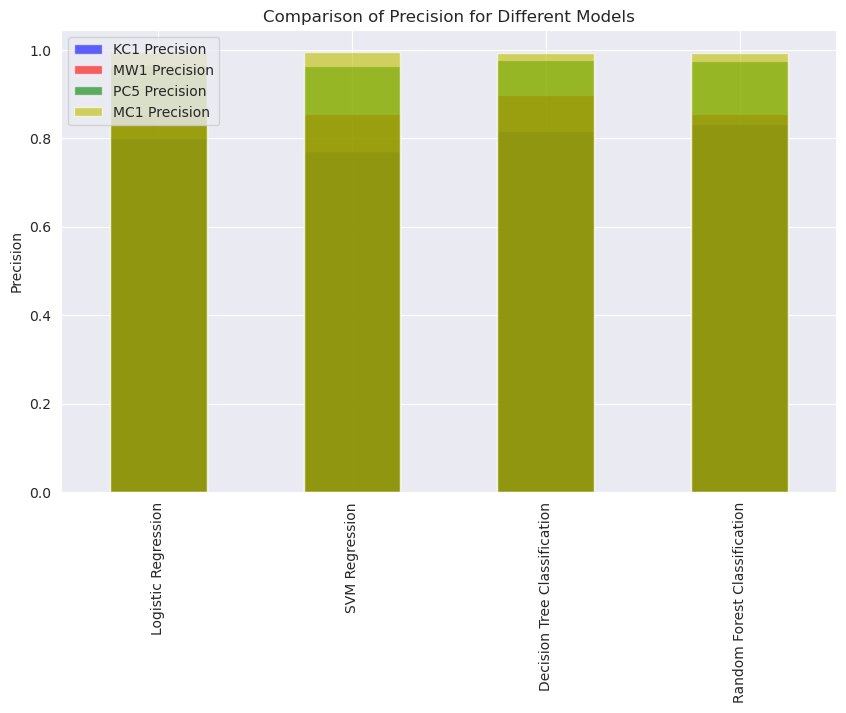

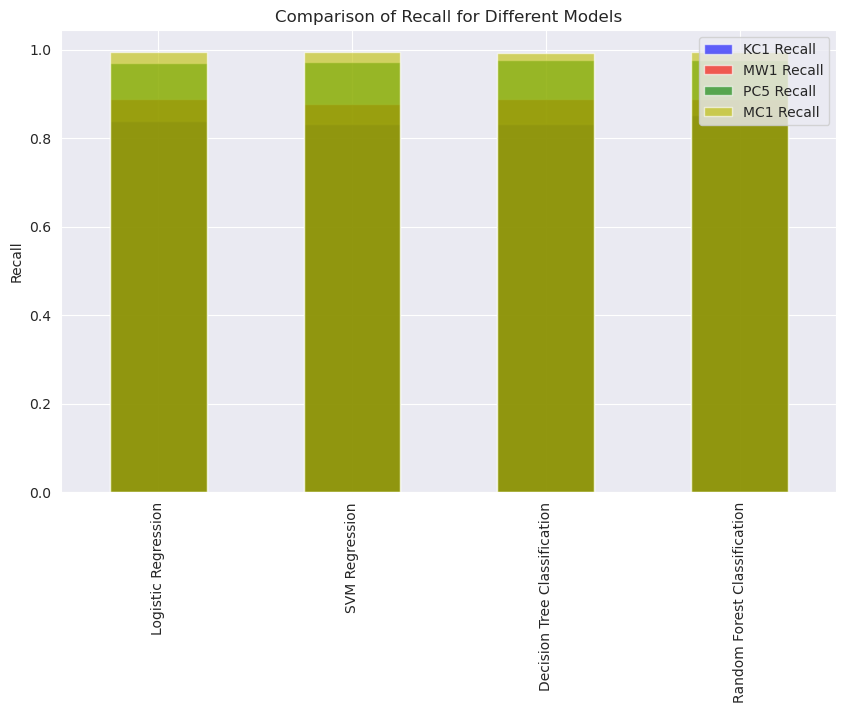

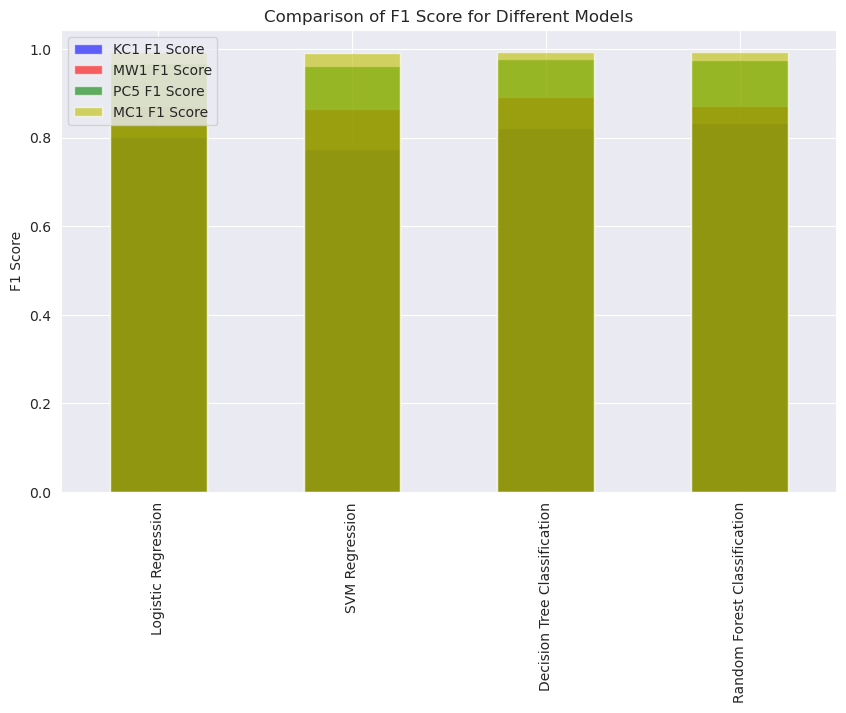

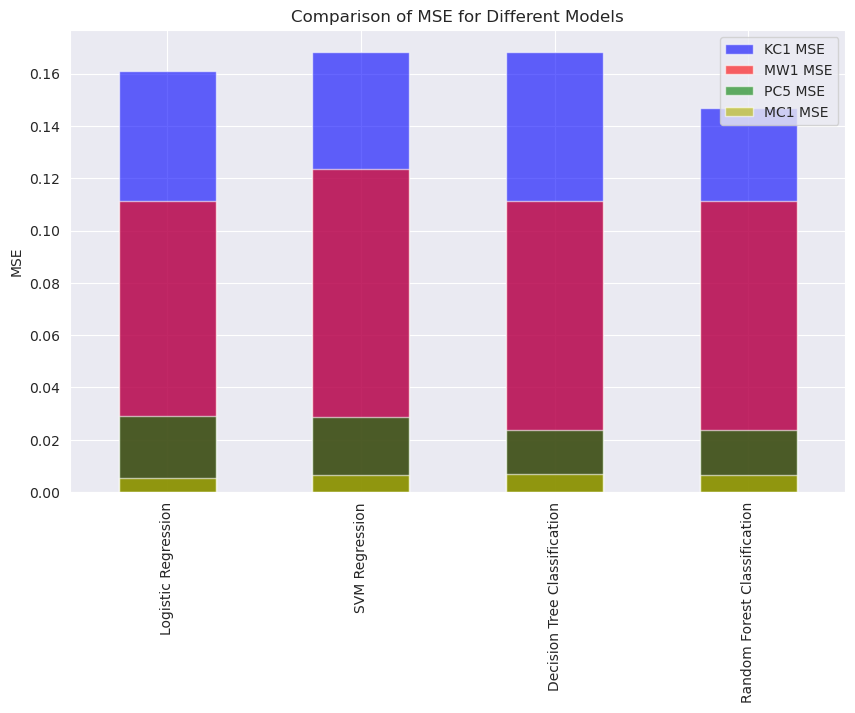

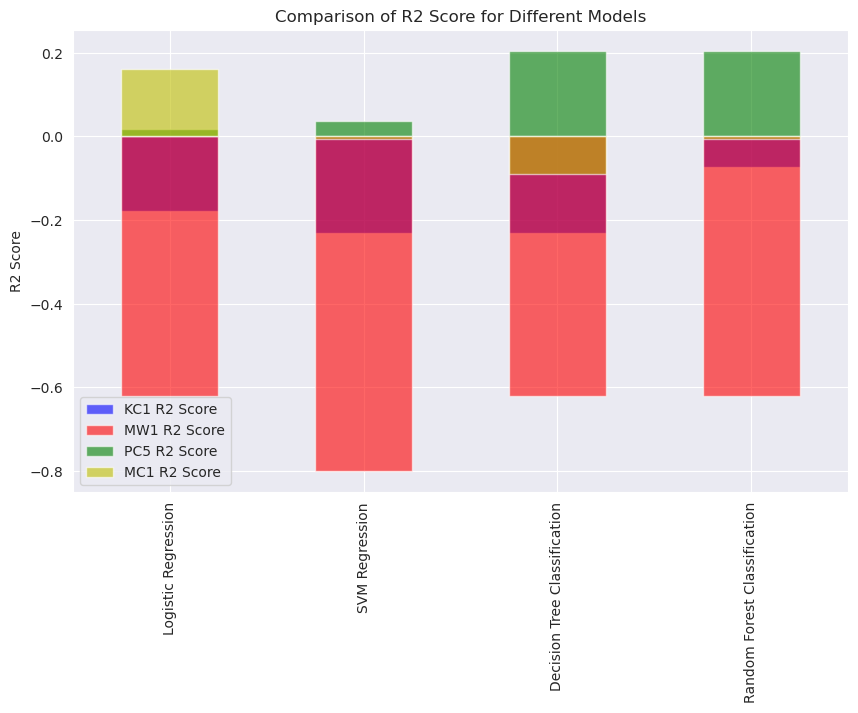

In [51]:
# Define the metrics and datasets
metrics = ['Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score']
datasets = {
    'KC1': results_kc1_df,
    'MW1': results_mw1_df,
    'PC5': results_pc5_df,
    'MC1': results_mc1_df
}

# Define colors for each dataset
colors = {
    'KC1': 'b',
    'MW1': 'r',
    'PC5': 'g',
    'MC1': 'y'
}

# Plot the comparison of each metric for all datasets
for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))
    for dataset_name, results_df in datasets.items():
        results_df.loc[metric].plot(kind='bar', ax=ax, alpha=0.6, color=colors[dataset_name], label=f'{dataset_name} {metric}')

    plt.title(f"Comparison of {metric} for Different Models")
    plt.ylabel(metric)
    plt.legend()
    plt.show()

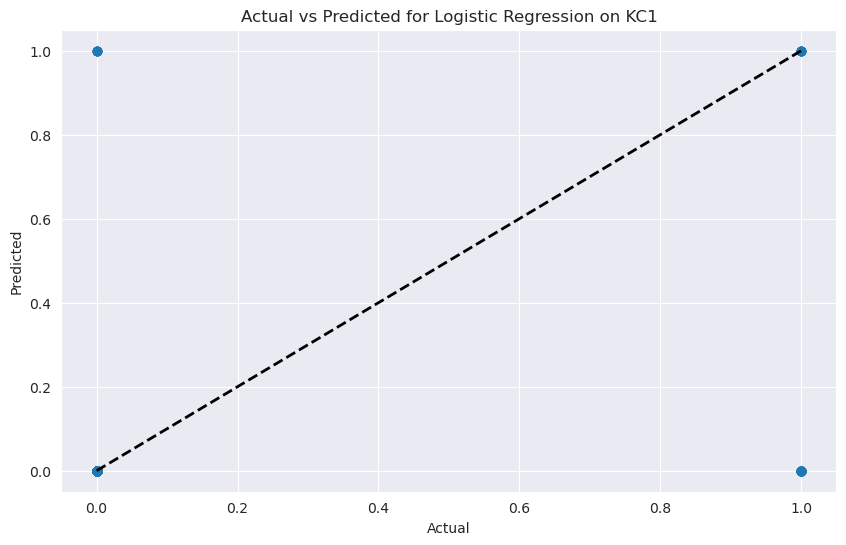

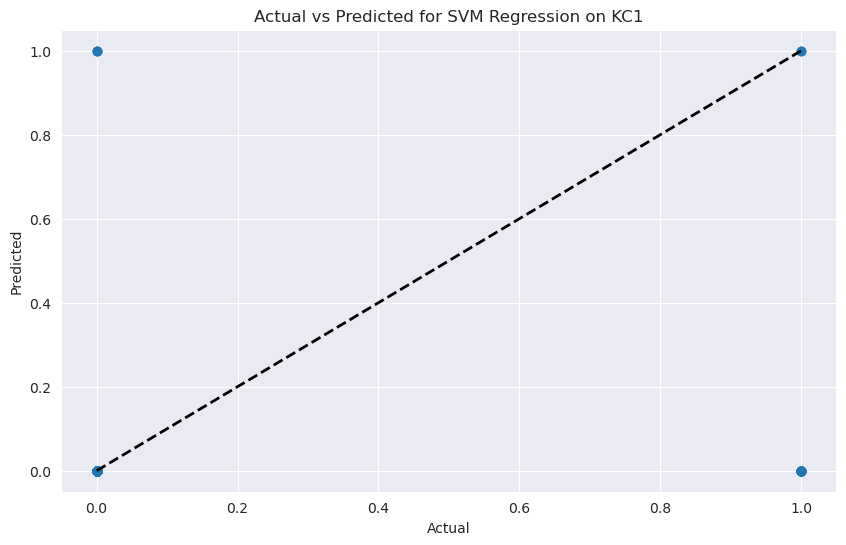

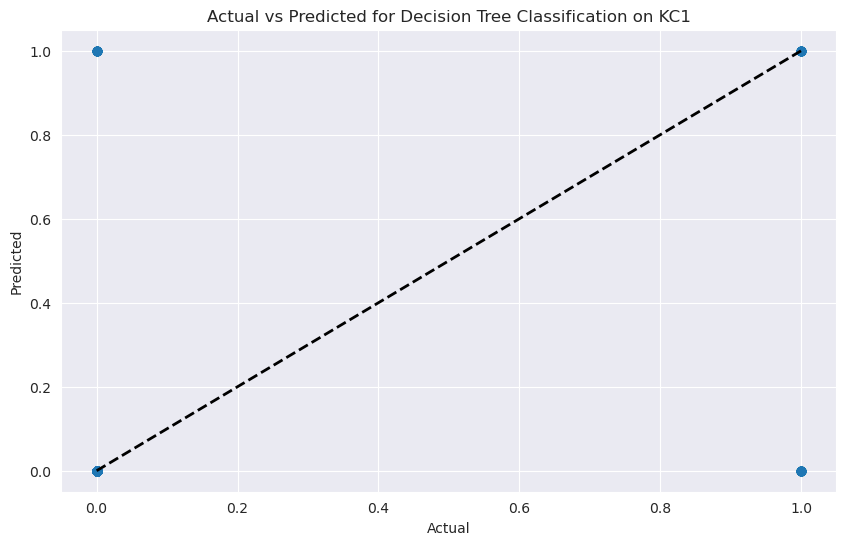

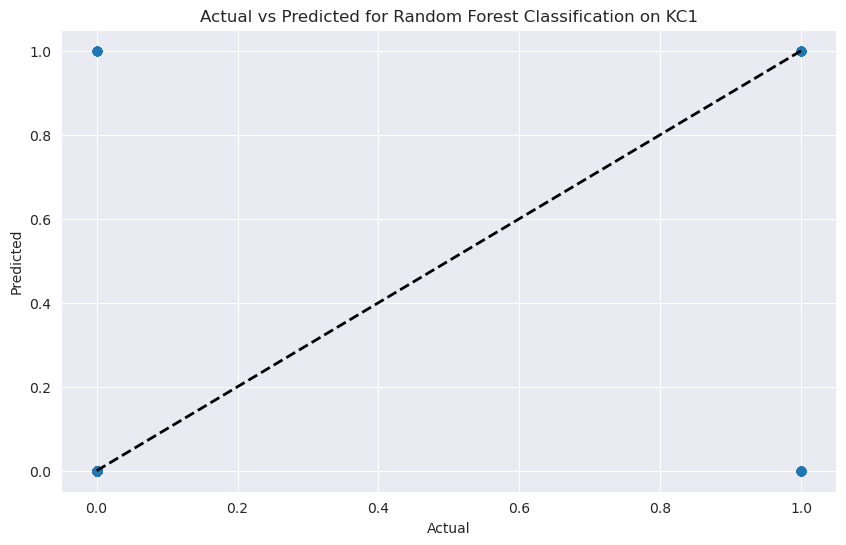

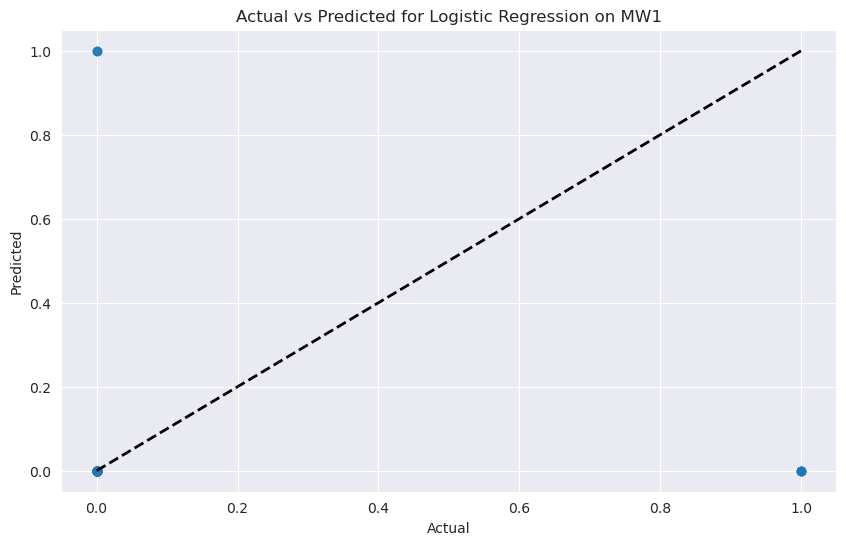

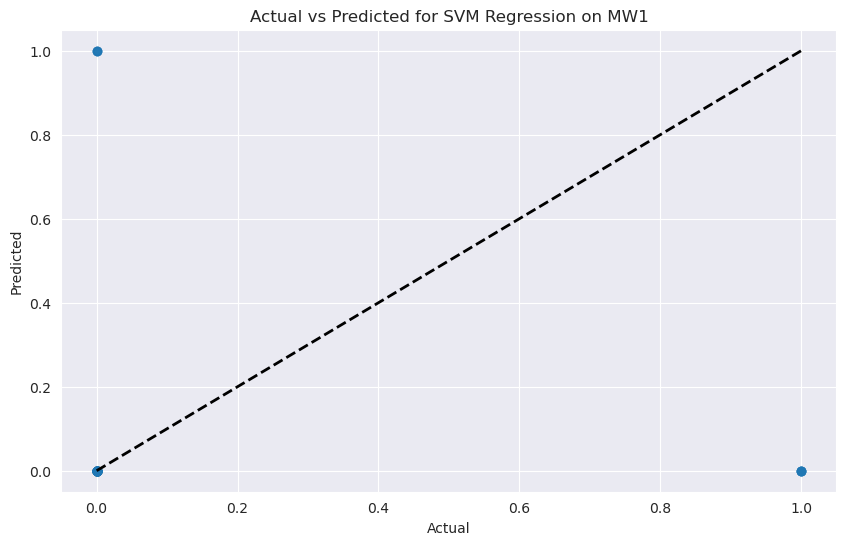

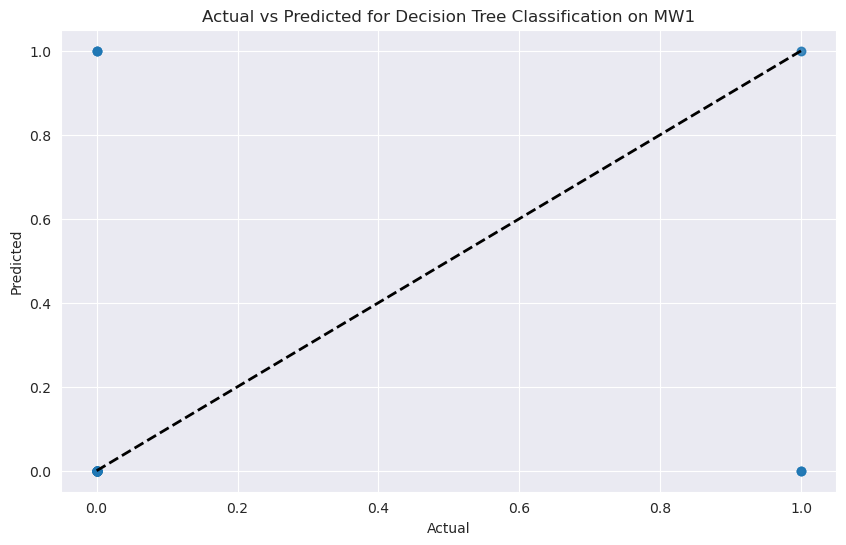

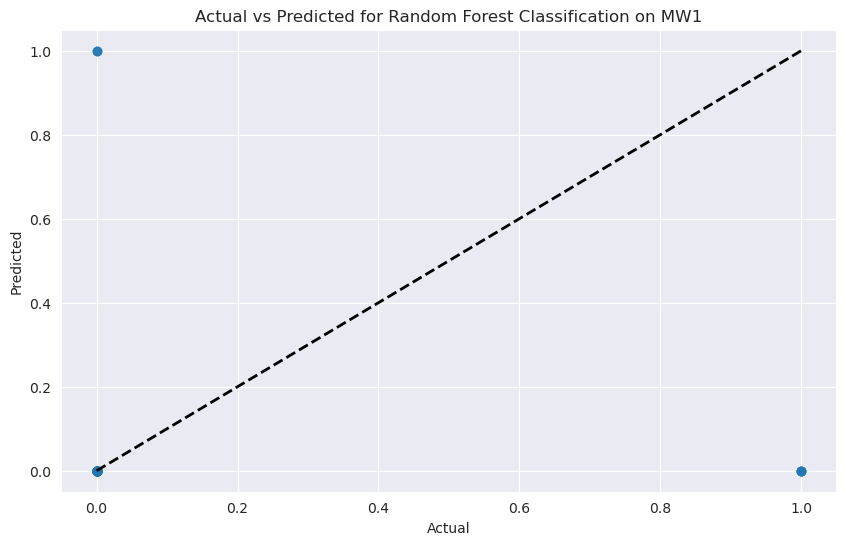

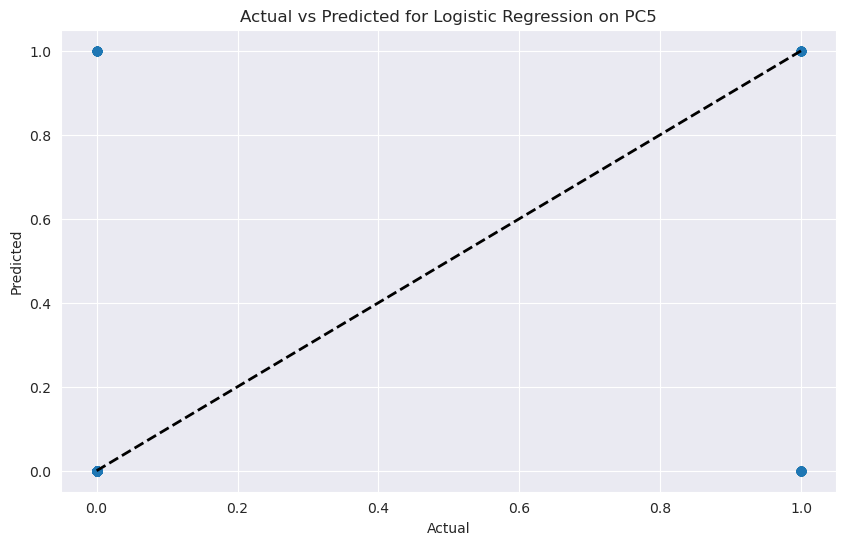

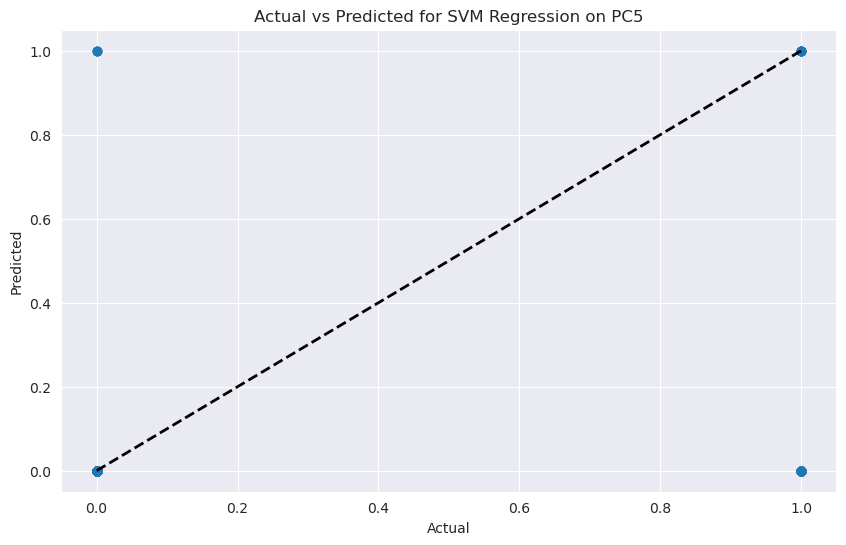

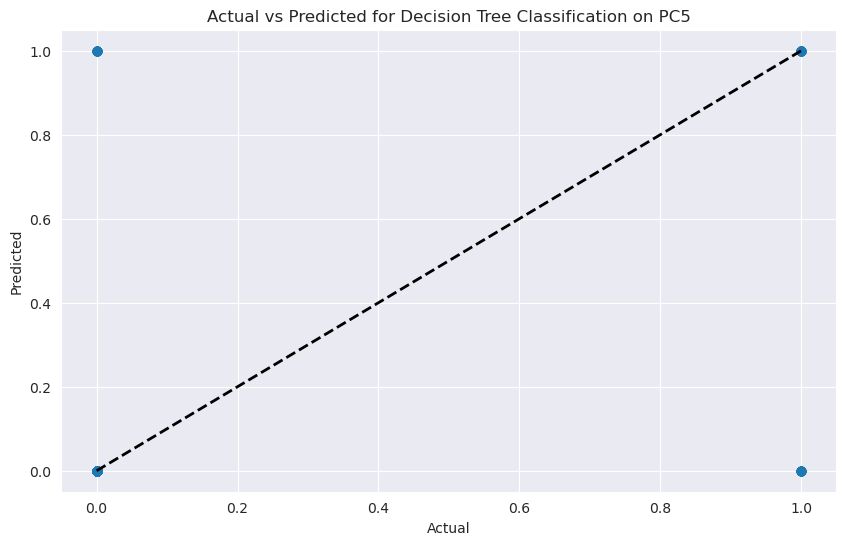

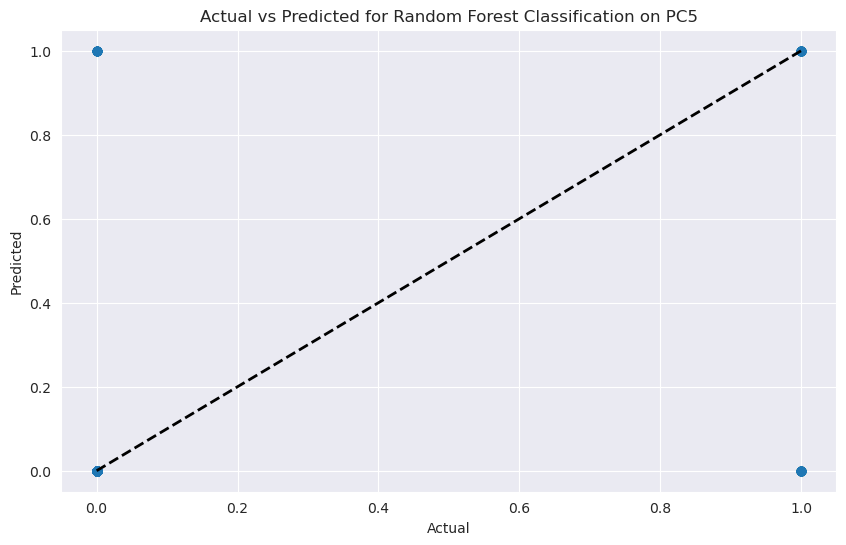

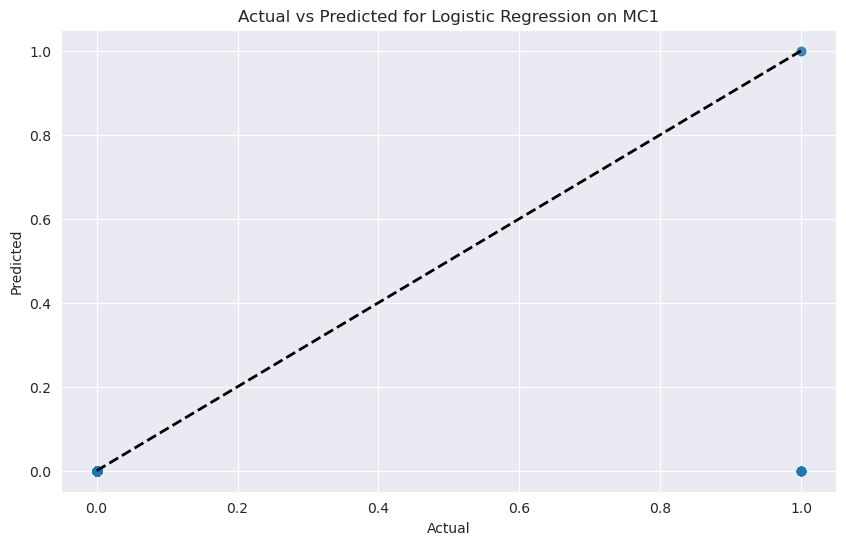

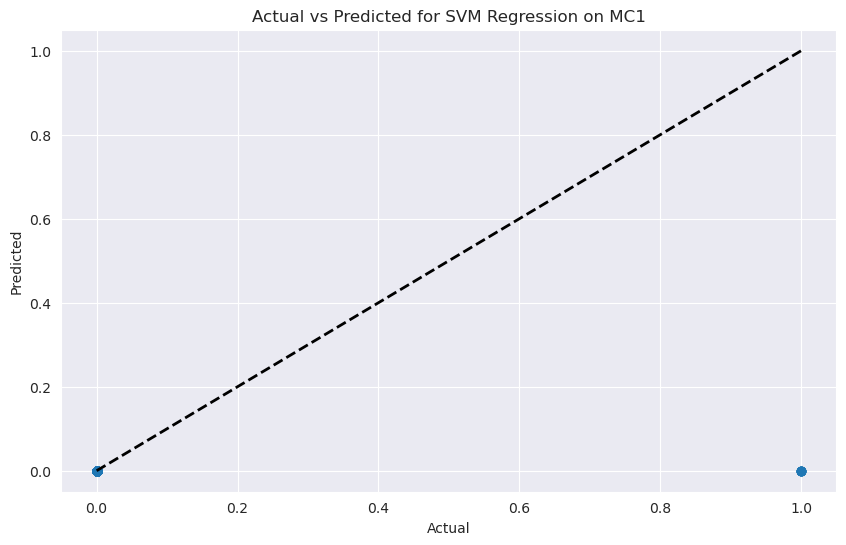

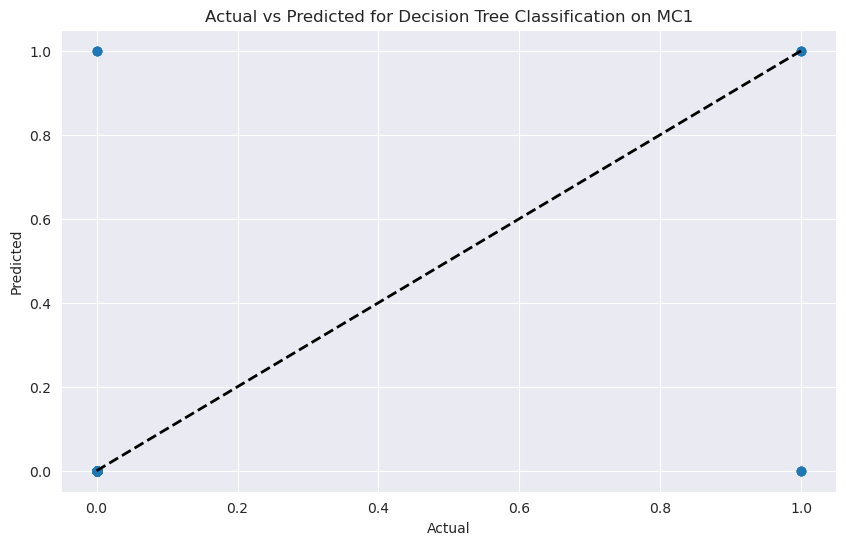

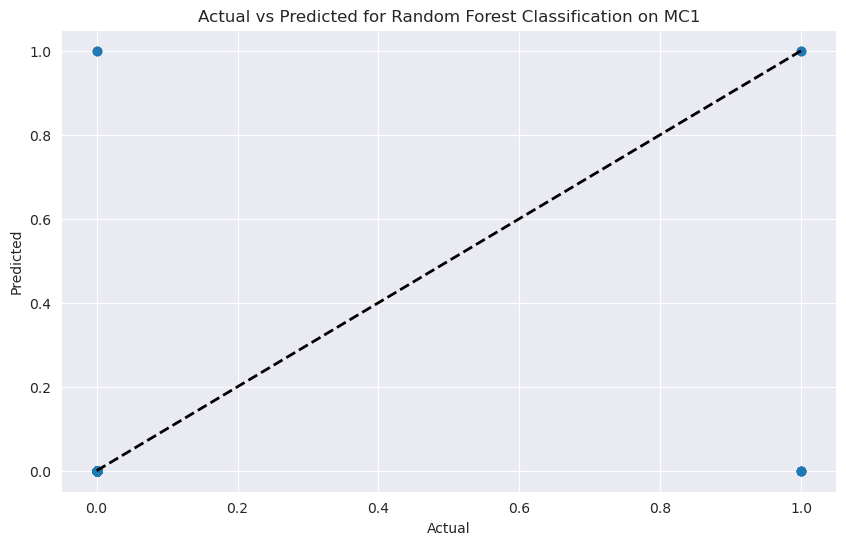

In [52]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name} on {dataset_name}')
    plt.show()

# Plot graphs for each model on each dataset
datasets = {
    'KC1': (X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1),
    'MW1': (X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1),
    'PC5': (X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5),
    'MC1': (X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1)
}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plot_actual_vs_predicted(y_test, y_pred, model_name, dataset_name)

In [53]:
# import matplotlib.pyplot as plt
# 
# # Function to plot actual vs predicted values with red and blue dots
# def plot_actual_vs_predicted(y_true, y_pred, model_name, dataset_name):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_true, y_true, color='red', alpha=0.6, label='Actual')
#     plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label='Predicted')
#     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.title(f'Actual vs Predicted for {model_name} on {dataset_name}')
#     plt.legend()
#     plt.show()
# 
# # Plot graphs for each model on each dataset
# datasets = {
#     'KC1': (X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1),
#     'MW1': (X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1),
#     'PC5': (X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5),
#     'MC1': (X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1)
# }
# 
# for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
#     for model_name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         plot_actual_vs_predicted(y_test, y_pred, model_name, dataset_name)

In [54]:
# # Importing necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Function to preprocess the dataset (handle missing values, scaling, train/test split)
# def preprocess_data(dataset, target_column):
#     # Drop rows with missing target values (if any)
#     dataset = dataset.dropna(subset=[target_column])
# 
#     # Separating the features (X) and target (y)
#     X = dataset.drop(columns=[target_column])
#     y = dataset[target_column]
# 
#     # Split the data into training and testing sets (80% train, 20% test)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
#     # Standardize the features (scale the data)
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
# 
#     return X_train_scaled, X_test_scaled, y_train, y_test
# 
# # Function to evaluate models using accuracy, precision, recall, f1 score, mse, and r2 score
# def evaluate_model(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)
#     mse = mean_squared_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     return accuracy, precision, recall, f1, mse, r2
# 
# # Load the datasets
# dataset_kc1 = pd.read_csv('csv_result-KC1.csv')
# dataset_mw1 = pd.read_csv('csv_result-MW1.csv')
# dataset_pc5 = pd.read_csv('csv_result-PC5.csv')
# dataset_mc1 = pd.read_csv('csv_result-MC1.csv')
# 
# # Preprocess the datasets
# X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1 = preprocess_data(dataset_kc1, 'Defective')
# X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1 = preprocess_data(dataset_mw1, 'Defective')
# X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5 = preprocess_data(dataset_pc5, 'Defective')
# X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1 = preprocess_data(dataset_mc1, 'Defective')
# 
# # Dictionary to store results for all datasets
# results_kc1 = {}
# results_mw1 = {}
# results_pc5 = {}
# results_mc1 = {}
# 
# # Models to be applied
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'SVM Classification': SVC(kernel='linear'),
#     'Decision Tree Classification': DecisionTreeClassifier(criterion='entropy'),
#     'Random Forest Classification': RandomForestClassifier(random_state=42, n_estimators=100)
# }
# 
# # Train and evaluate each model for the KC1 dataset
# for model_name, model in models.items():
#     model.fit(X_train_kc1, y_train_kc1)
#     y_pred = model.predict(X_test_kc1)
#     results_kc1[model_name] = evaluate_model(y_test_kc1, y_pred)
# 
# # Train and evaluate each model for the MW1 dataset
# for model_name, model in models.items():
#     model.fit(X_train_mw1, y_train_mw1)
#     y_pred = model.predict(X_test_mw1)
#     results_mw1[model_name] = evaluate_model(y_test_mw1, y_pred)
# 
# # Train and evaluate each model for the PC5 dataset
# for model_name, model in models.items():
#     model.fit(X_train_pc5, y_train_pc5)
#     y_pred = model.predict(X_test_pc5)
#     results_pc5[model_name] = evaluate_model(y_test_pc5, y_pred)
# 
# # Train and evaluate each model for the MC1 dataset
# for model_name, model in models.items():
#     model.fit(X_train_mc1, y_train_mc1)
#     y_pred = model.predict(X_test_mc1)
#     results_mc1[model_name] = evaluate_model(y_test_mc1, y_pred)
# 
# # Convert results to DataFrame for easy comparison
# results_kc1_df = pd.DataFrame(results_kc1, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
# results_mw1_df = pd.DataFrame(results_mw1, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
# results_pc5_df = pd.DataFrame(results_pc5, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
# results_mc1_df = pd.DataFrame(results_mc1, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score'])
# 
# print("KC1 Dataset Results:\n", results_kc1_df)
# print("\nMW1 Dataset Results:\n", results_mw1_df)
# print("\nPC5 Dataset Results:\n", results_pc5_df)
# print("\nMC1 Dataset Results:\n", results_mc1_df)
# 
# # Plot the comparison of metrics for all 4 datasets
# metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'R2 Score']
# datasets = {
#     'KC1': results_kc1_df,
#     'MW1': results_mw1_df,
#     'PC5': results_pc5_df,
#     'MC1': results_mc1_df
# }
# 
# colors = {
#     'KC1': 'b',
#     'MW1': 'r',
#     'PC5': 'g',
#     'MC1': 'y'
# }
# 
# for metric in metrics:
#     fig, ax = plt.subplots(figsize=(10, 6))
#     for dataset_name, results_df in datasets.items():
#         results_df.loc[metric].plot(kind='bar', ax=ax, alpha=0.6, color=colors[dataset_name], label=f'{dataset_name} {metric}')
#     plt.title(f"Comparison of {metric} for Different Models")
#     plt.ylabel(metric)
#     plt.legend()
#     plt.show()
# 
# # Function to plot actual vs predicted values with Seaborn
# def plot_actual_vs_predicted(y_true, y_pred, model_name, dataset_name):
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=y_true, y=y_true, color='red', alpha=0.6, label='Actual')
#     sns.scatterplot(x=y_true, y=y_pred, color='blue', alpha=0.6, label='Predicted')
#     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.title(f'Actual vs Predicted for {model_name} on {dataset_name}')
#     plt.legend()
#     plt.show()
# 
# # Plot graphs for each model on each dataset
# datasets = {
#     'KC1': (X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1),
#     'MW1': (X_train_mw1, X_test_mw1, y_train_mw1, y_test_mw1),
#     'PC5': (X_train_pc5, X_test_pc5, y_train_pc5, y_test_pc5),
#     'MC1': (X_train_mc1, X_test_mc1, y_train_mc1, y_test_mc1)
# }
# 
# for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
#     for model_name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         plot_actual_vs_predicted(y_test, y_pred, model_name, dataset_name)